## 1. Project STKI: Analisis Harga Mobil BMW
### Identitas Lengkap
- Nama: Akhmad Haris
- Nim: A11.2022.14626
- Kelompok: A11.4517

## 2. Ringkasan dan Permasalahan Project

### Ringkasan
Proyek ini bertujuan untuk memprediksi harga mobil BMW berdasarkan beberapa fitur seperti tahun,model, jarak tempuh, pajak, mpg, dan ukuran mesin. Model ini diharapkan dapat memberikan estimasi harga mobil yang akurat sehingga dapat membantu dalam pengambilan keputusan untuk pembelian atau penjualan mobil.

### Permasalahan
Bagaimana cara memprediksi harga mobil dengan menggunakan dataset yang berisi informasi mengenai fitur-fitur mobil?

### Tujuan
Membangun model yang mampu memprediksi harga mobil dengan akurasi tinggi.


### Model / Alur Penyelesaian:

```mermaid
graph LR
A[Dataset Load] --> B[EDA]
B --> C[Feature Engineering]
C --> D[Model Selection]
D --> E[Model Training and Testing]
E --> F[Evaluation]

## 3. Penjelasan Dataset, EDA, dan Proses Features Dataset

### Dataset
Dataset yang digunakan adalah dataset harga mobil BMW yang berisi informasi tentang harga mobil dan beberapa fitur seperti tahun, jarak tempuh, pajak, mpg, ukuran mesin, dan model mobil.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('bmw.csv')

# Tampilkan 5 baris pertama dataset
data.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Exploratory Data Analysis (EDA)
Lakukan EDA untuk memahami data secara lebih mendalam. Beberapa hal yang bisa dilakukan antara lain:
- Descriptive statistics
- Data visualization
- Identifikasi missing values
- Analisis distribusi data


In [13]:
# Descriptive statistics
data.describe()


,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


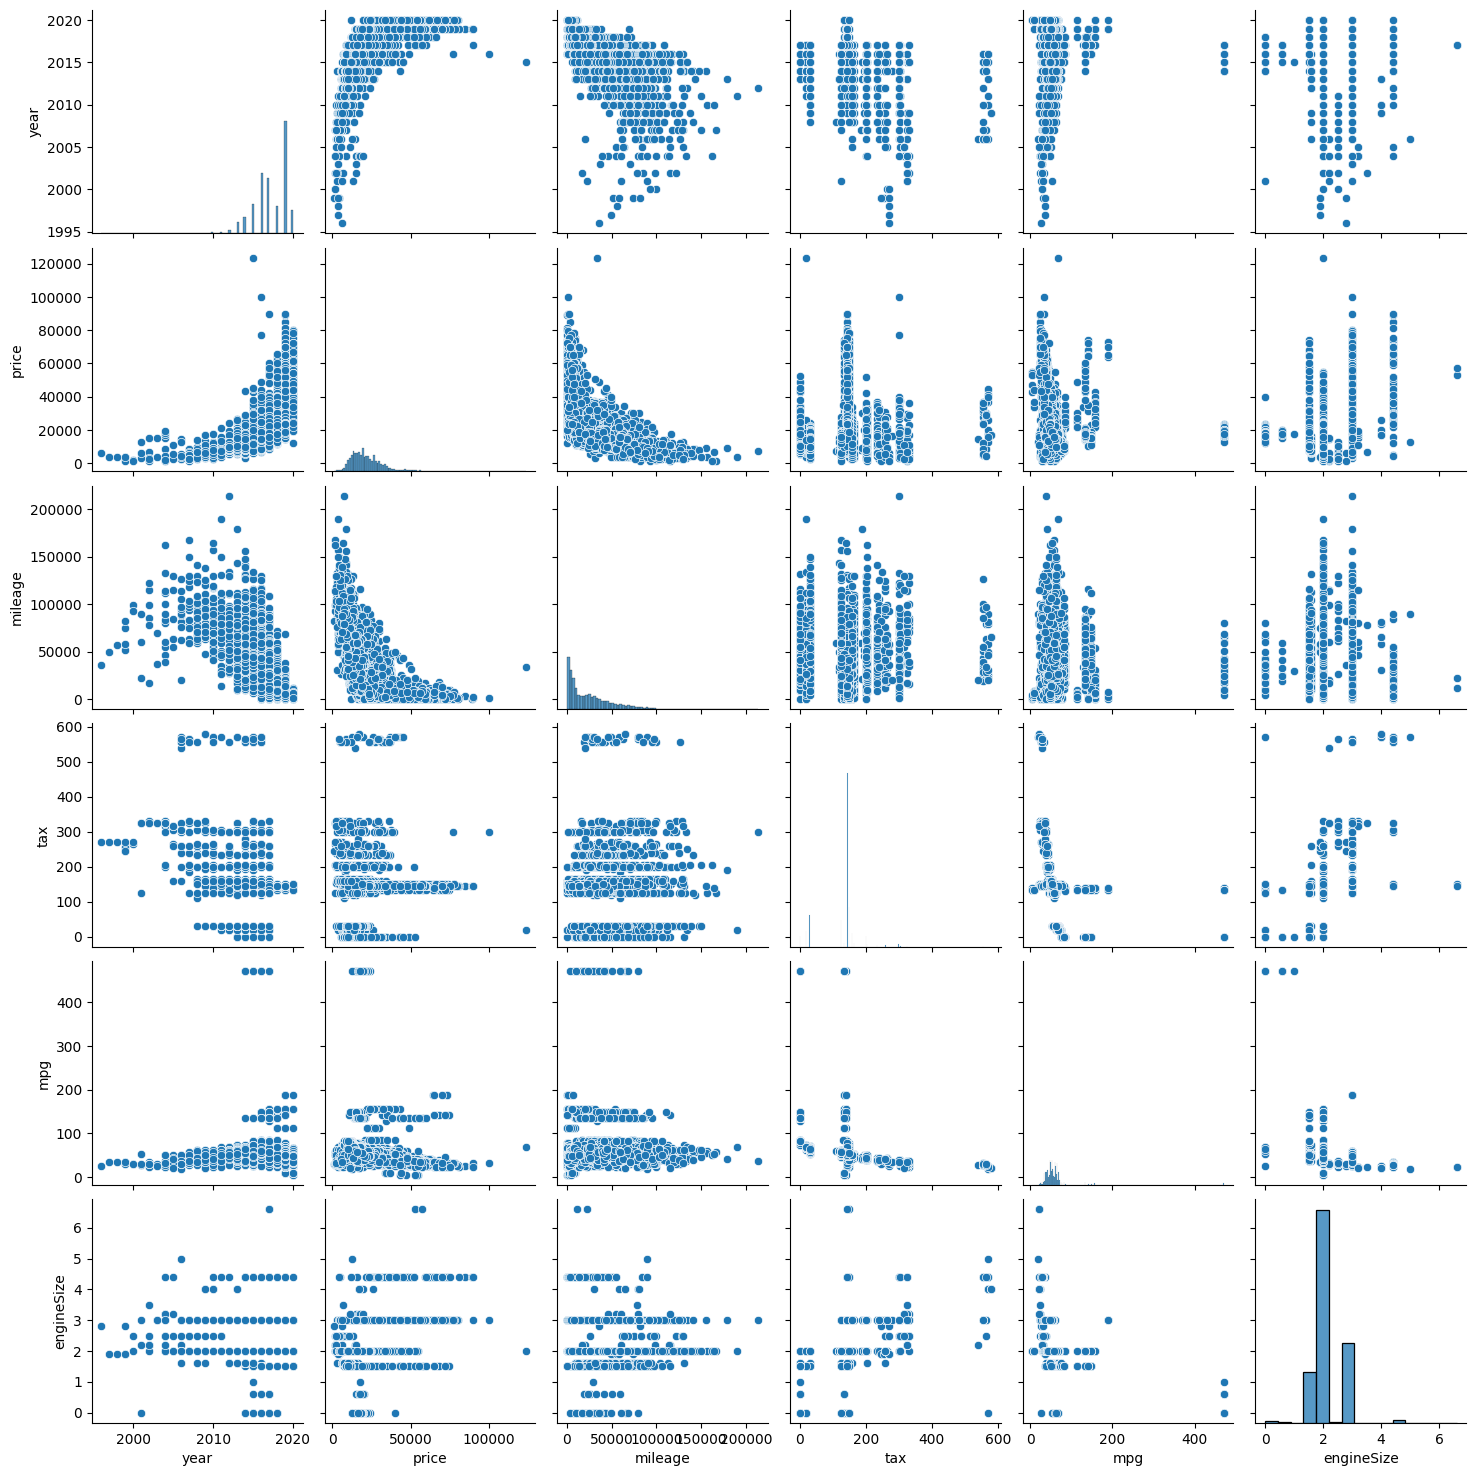

In [14]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(data)
plt.show()


In [15]:
# Identifikasi missing values
data.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

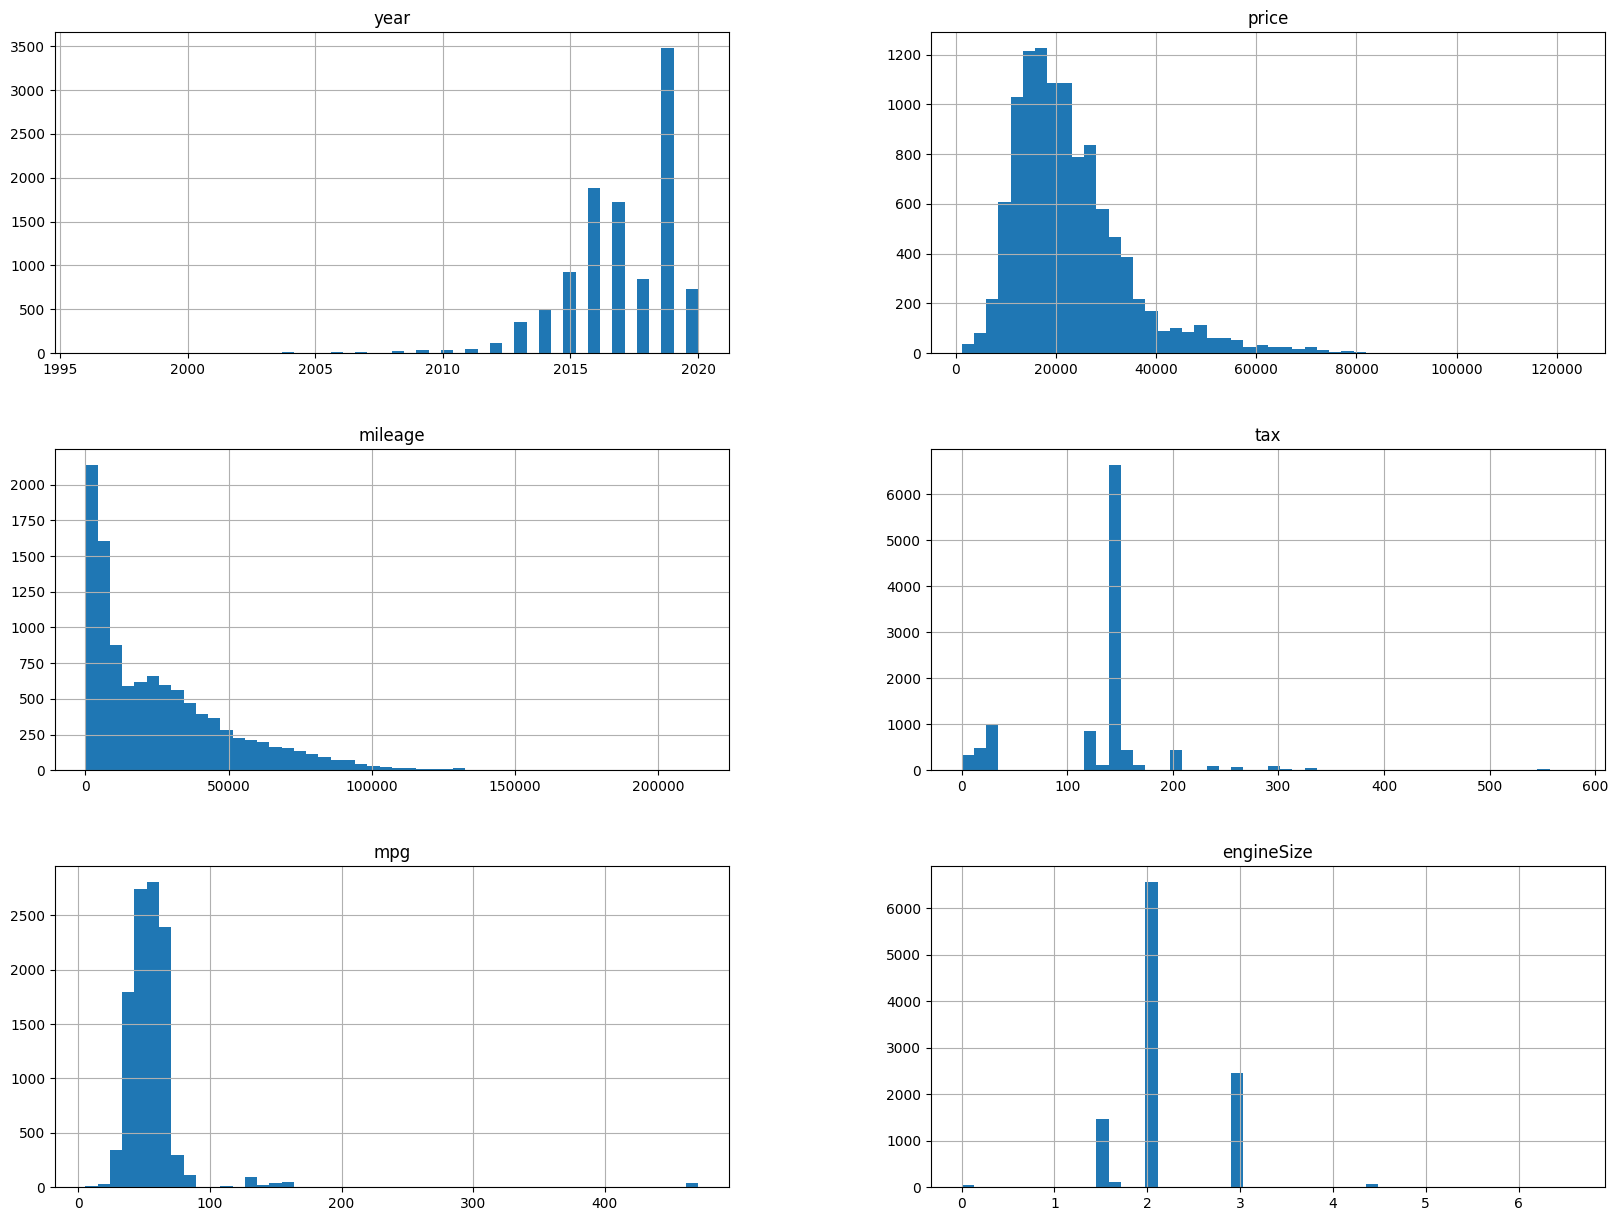

In [16]:
# Analisis distribusi data
data.hist(bins=50, figsize=(20,15))
plt.show()


### Proses Features Dataset
Jelaskan proses pembersihan data, penanganan missing values, encoding, scaling, dan fitur-fitur lainnya yang digunakan dalam modeling.


In [33]:
# Load dataset dan pemodelan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('bmw.csv')

# One-hot encoding untuk fitur kategorikal
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('price', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[1:])
scaled_data['price'] = data['price']

# Tampilkan 5 baris pertama dari data yang telah diskalakan
scaled_data.head()


,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,11200,1.653447,-0.108963,0.038326,-0.303911,-0.358698,-0.541291,-0.318867,3.034680,-0.100593,...,-0.025489,-0.100593,-0.063281,-0.039741,-0.553312,-0.873523,-0.016684,-0.168603,-0.057883,-0.681186
1,27000,-0.424388,0.216199,-0.433982,-0.303911,-0.358698,-0.541291,-0.318867,-0.329524,9.941030,...,-0.025489,-0.100593,-0.063281,-0.039741,-0.553312,-0.873523,-0.016684,-0.168603,-0.057883,1.468028
2,16000,1.483453,0.460070,-0.159533,1.507591,-0.358698,-0.541291,-0.318867,3.034680,-0.100593,...,-0.025489,-0.100593,-0.063281,-0.039741,-0.553312,-0.873523,-0.016684,-0.168603,-0.057883,-0.681186
3,12750,0.046894,0.216199,0.510634,-1.209662,-0.358698,-0.541291,-0.318867,-0.329524,-0.100593,...,-0.025489,-0.100593,-0.063281,-0.039741,-0.553312,-0.873523,-0.016684,-0.168603,-0.057883,-0.681186
4,14500,0.559104,0.460070,-0.191445,1.507591,-0.358698,-0.541291,-0.318867,-0.329524,-0.100593,...,-0.025489,-0.100593,-0.063281,-0.039741,-0.553312,-0.873523,-0.016684,-0.168603,-0.057883,-0.681186


## 4. Proses Learning / Modeling

Jelaskan proses pemodelan yang dilakukan. Beberapa hal yang bisa dijelaskan antara lain:
- Pemilihan model
- Training dan validation
- Hyperparameter tuning
- Cross-validation


In [21]:

# Load dataset dan pemodelan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('bmw.csv')

# One-hot encoding untuk fitur kategorikal
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('price', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[1:])
scaled_data['price'] = data['price']

# Split data
X = scaled_data.drop('price', axis=1)
y = scaled_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluasi model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.4f}")


Mean Absolute Error (MAE): 3538.41
Mean Squared Error (MSE): 24633365.92
R-squared (R²): 0.8095


In [22]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Results:\n")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


Random Forest Regressor Results:

Mean Absolute Error (MAE): 1944.90
Mean Squared Error (MSE): 9897898.38
R-squared (R²): 0.9235


In [25]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi model Gradient Boosting Regressor
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor Results:\n")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"R-squared (R²): {r2_gb:.4f}")

Gradient Boosting Regressor Results:

Mean Absolute Error (MAE): 2510.87
Mean Squared Error (MSE): 13301123.76
R-squared (R²): 0.8971


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('bmw.csv')

# One-hot encoding untuk fitur kategorikal
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Split data
X = data.drop('price', axis=1)
y = data['price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Melatih model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Memprediksi dengan model
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("\n")

# Evaluasi masing-masing model
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting Regressor')


Linear Regression Results:
Mean Absolute Error (MAE): 2821.98
Mean Squared Error (MSE): 18128757.31
R-squared (R²): 0.8598


Random Forest Regressor Results:
Mean Absolute Error (MAE): 1615.43
Mean Squared Error (MSE): 7441319.01
R-squared (R²): 0.9425


Gradient Boosting Regressor Results:
Mean Absolute Error (MAE): 2151.98
Mean Squared Error (MSE): 11165009.78
R-squared (R²): 0.9137




## Diskusi Hasil dan Kesimpulan

### Diskusi Hasil
- **Linear Regression**: Model ini memberikan hasil yang cukup baik, namun kurang mampu menangani non-linearitas dalam data.
- **Random Forest**: Model ini menunjukkan performa yang sangat baik dengan R² yang tinggi, menunjukkan kemampuan yang baik dalam menangani data yang kompleks.
- **Gradient Boosting**: Model ini juga memberikan performa yang baik, sedikit lebih baik dari Linear Regression namun masih di bawah Random Forest dalam hal akurasi prediksi.

### Kesimpulan
Berdasarkan hasil evaluasi, model Random Forest adalah yang terbaik untuk prediksi harga mobil bekas BMW dalam dataset ini, diikuti oleh Gradient Boosting dan Linear Regression. Langkah selanjutnya bisa termasuk lebih banyak tuning hyperparameter untuk model Random Forest atau mencoba model-model lain yang lebih canggih untuk peningkatan akurasi lebih lanjut.
